# Model2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

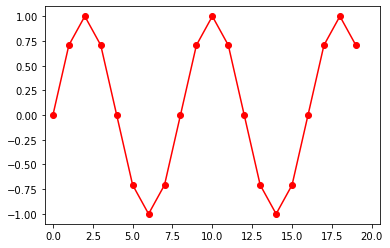

In [4]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

In [5]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [6]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [7]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [8]:
Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

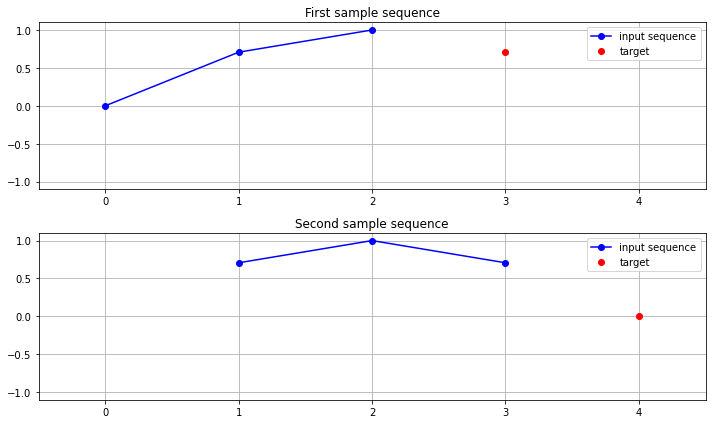

In [9]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

In [17]:
model2 = Sequential()
model2.add(SimpleRNN(5, input_shape=(3, 1)))
model2.add(Dense(1, activation="linear"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.compile(loss='mse', optimizer='sgd')

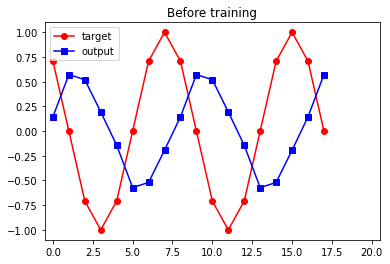

In [19]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [20]:
history = model2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8301
Epoch 2/100
18/18 [==============================] - 0s 0us/step - loss: 0.7977
Epoch 3/100
18/18 [==============================] - 0s 56us/step - loss: 0.7669
Epoch 4/100
18/18 [==============================] - 0s 55us/step - loss: 0.7375
Epoch 5/100
18/18 [==============================] - 0s 0us/step - loss: 0.7094
Epoch 6/100
18/18 [==============================] - 0s 0us/step - loss: 0.6825
Epoch 7/100
18/18 [==============================] - 0s 221us/step - loss: 0.6568
Epoch 8/100
18/18 [==============================] - 0s 55us/step - loss: 0.6322
Epoch 9/100
18/18 [==============================] - 0s 58us/step - loss: 0.6087
Epoch 10/100
18/18 [==============================] - 0s 57us/step - loss: 0.5861
Epoch 11/100
18/18 [==============================] - 0s 0us/step - loss: 0.5644
Epoch 12/100
18/18 [==============================] - 0s 55us/step - loss: 0.5436
Epoch 13/100
18/18 [=========

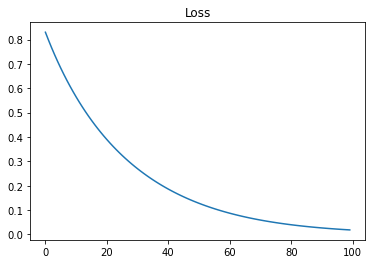

In [21]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

# Model 3

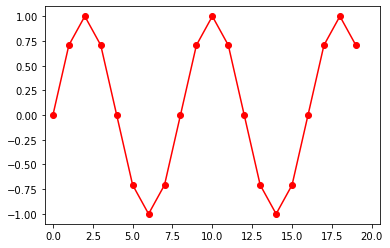

In [31]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

In [32]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [33]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

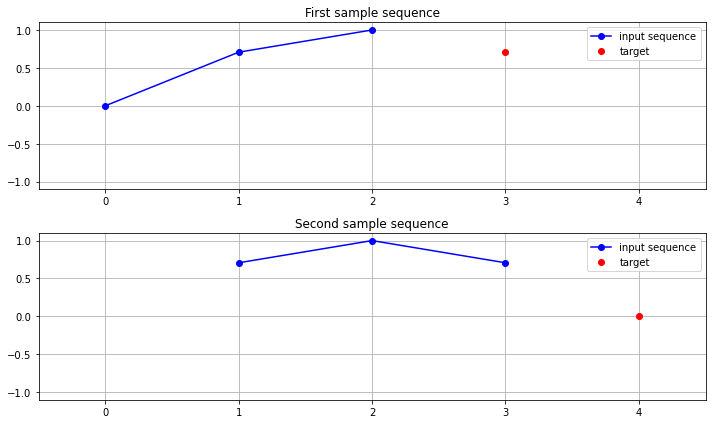

In [34]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

In [35]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

In [36]:
model3 = Sequential()
model3.add(SimpleRNN(20, input_shape=(3, 1)))
model3.add(Dense(1, activation="linear"))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [37]:
model3.compile(loss='mse', optimizer='sgd')

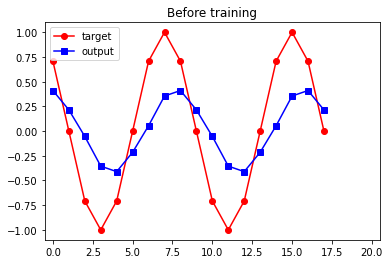

In [38]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model3.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [39]:
history = model3.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2245
Epoch 2/100
18/18 [==============================] - 0s 0us/step - loss: 0.1962
Epoch 3/100
18/18 [==============================] - 0s 55us/step - loss: 0.1717
Epoch 4/100
18/18 [==============================] - 0s 55us/step - loss: 0.1504
Epoch 5/100
18/18 [==============================] - 0s 55us/step - loss: 0.1320
Epoch 6/100
18/18 [==============================] - 0s 54us/step - loss: 0.1160
Epoch 7/100
18/18 [==============================] - 0s 55us/step - loss: 0.1021
Epoch 8/100
18/18 [==============================] - 0s 55us/step - loss: 0.0899
Epoch 9/100
18/18 [==============================] - 0s 56us/step - loss: 0.0793
Epoch 10/100
18/18 [==============================] - 0s 55us/step - loss: 0.0700
Epoch 11/100
18/18 [==============================] - 0s 55us/step - loss: 0.0619
Epoch 12/100
18/18 [==============================] - 0s 55us/step - loss: 0.0548
Epoch 13/100
18/18 [=======

Epoch 100/100
18/18 [==============================] - 0s 55us/step - loss: 7.1449e-04


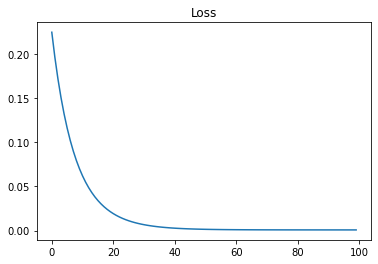

In [40]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()